In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import astropy.units as u

from plato.planets import PopulationModel, TransitModel
from plato.stars import filter_valid_targets

In [2]:
LOPS1 = pd.read_csv(
    "../data/processed/LOPS2_targets.csv",
    usecols=[
        "Radius",
        "Mass",
        "gaiaV",
        "[Fe/H]",
        "u1",
        "u2",
        "n_cameras",
        "Stellar Type",
        "Teff",
        "logg",
        "gaiaID_DR3",
    ],
)

LOPS1 = filter_valid_targets(LOPS1).rename(
    columns={"Radius": "R_star", "Mass": "M_star", "gaiaV": "Magnitude_V"}
)

In [3]:
LOPS1

,[Fe/H],logg,Magnitude_V,R_star,M_star,Teff,Stellar Type,u1,u2,n_cameras
0,0.2500,3.7400,12.062901,1.963,1.274,5683.290039,FGK,0.485361,0.134300,24
1,-0.4400,4.3300,10.951415,2.126,1.472,6352.410156,FGK,0.423338,0.162962,24
2,-0.2300,3.8000,10.918083,1.996,1.377,6091.700195,FGK,0.438469,0.160530,24
3,-0.4950,3.6912,12.830949,2.562,1.461,5903.970215,FGK,0.465564,0.142195,24
4,0.4500,3.7500,11.636767,1.744,1.166,5434.029785,FGK,0.501716,0.136891,24
...,...,...,...,...,...,...,...,...,...,...
127471,0.3100,3.5000,12.800469,2.593,1.483,5962.950195,FGK,0.443705,0.163549,6
127472,-0.0900,4.1800,8.487226,1.380,1.232,6238.970215,FGK,0.446983,0.146548,6
127473,-0.3793,4.2504,12.886827,1.352,1.272,6476.000000,FGK,0.409611,0.171281,6
127474,-0.1800,3.4300,12.365505,2.425,1.510,6214.620117,FGK,0.456193,0.141745,6


In [4]:
# LOPS1 = LOPS1[LOPS1["[Fe/H]"].between(-0.6, 0.5)]

In [5]:
LOPS1["sigma_star"] = 10e-6

In [11]:
LOPS1

,[Fe/H],logg,Magnitude_V,R_star,M_star,Teff,Stellar Type,u1,u2,n_cameras,sigma_star
0,0.2500,3.7400,12.062901,1.963,1.274,5683.290039,FGK,0.485361,0.134300,24,0.00001
1,-0.4400,4.3300,10.951415,2.126,1.472,6352.410156,FGK,0.423338,0.162962,24,0.00001
2,-0.2300,3.8000,10.918083,1.996,1.377,6091.700195,FGK,0.438469,0.160530,24,0.00001
3,-0.4950,3.6912,12.830949,2.562,1.461,5903.970215,FGK,0.465564,0.142195,24,0.00001
4,0.4500,3.7500,11.636767,1.744,1.166,5434.029785,FGK,0.501716,0.136891,24,0.00001
...,...,...,...,...,...,...,...,...,...,...,...
127471,0.3100,3.5000,12.800469,2.593,1.483,5962.950195,FGK,0.443705,0.163549,6,0.00001
127472,-0.0900,4.1800,8.487226,1.380,1.232,6238.970215,FGK,0.446983,0.146548,6,0.00001
127473,-0.3793,4.2504,12.886827,1.352,1.272,6476.000000,FGK,0.409611,0.171281,6,0.00001
127474,-0.1800,3.4300,12.365505,2.425,1.510,6214.620117,FGK,0.456193,0.141745,6,0.00001


In [6]:
o = PopulationModel(LOPS1, num_embryos=100)

In [7]:
o.stellar_population

,R_star,M_star,[Fe/H],Magnitude_V,sigma_star,u1,u2,n_cameras
0,1.963,1.274,0.2500,12.062901,0.00001,0.485361,0.134300,24
1,2.126,1.472,-0.4400,10.951415,0.00001,0.423338,0.162962,24
2,1.996,1.377,-0.2300,10.918083,0.00001,0.438469,0.160530,24
3,2.562,1.461,-0.4950,12.830949,0.00001,0.465564,0.142195,24
4,1.744,1.166,0.4500,11.636767,0.00001,0.501716,0.136891,24
...,...,...,...,...,...,...,...,...
127471,2.593,1.483,0.3100,12.800469,0.00001,0.443705,0.163549,6
127472,1.380,1.232,-0.0900,8.487226,0.00001,0.446983,0.146548,6
127473,1.352,1.272,-0.3793,12.886827,0.00001,0.409611,0.171281,6
127474,2.425,1.510,-0.1800,12.365505,0.00001,0.456193,0.141745,6


In [9]:
t = o.create_mock_population()

In [10]:
t

,system_id,R_planet,M_planet,a,R_star,M_star,[Fe/H],Magnitude_V,sigma_star,u1,u2,n_cameras,cos_i
0,637,1.090290,0.147609,19.420503,1.963,1.274,0.25,12.062901,0.00001,0.485361,0.134300,24,0.672080
1,637,0.962925,0.128175,22.908411,1.963,1.274,0.25,12.062901,0.00001,0.485361,0.134300,24,0.672080
2,637,3.261333,46.888220,0.086538,1.963,1.274,0.25,12.062901,0.00001,0.485361,0.134300,24,0.672080
3,637,2.963432,0.097115,35.405927,1.963,1.274,0.25,12.062901,0.00001,0.485361,0.134300,24,0.672080
4,637,2.239686,0.988673,7.723376,1.963,1.274,0.25,12.062901,0.00001,0.485361,0.134300,24,0.672080
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4301568,804,9.448276,37.297880,0.172371,3.550,1.380,0.17,11.962277,0.00001,0.564232,0.100795,6,0.682205
4301569,804,0.867916,0.105246,29.835647,3.550,1.380,0.17,11.962277,0.00001,0.564232,0.100795,6,0.682205
4301570,804,1.278248,0.225610,30.631195,3.550,1.380,0.17,11.962277,0.00001,0.564232,0.100795,6,0.682205
4301571,804,1.524838,0.360266,14.553717,3.550,1.380,0.17,11.962277,0.00001,0.564232,0.100795,6,0.682205


In [ ]:
print("careful, need to convert planet radius")

careful, need to convert planet radius


In [ ]:
g = TransitModel().is_transiting(
    a=t["semi_major_axis"].to_numpy() * u.AU,
    r_star=t["R_star"].to_numpy() * u.Rsun,
    r_p=(t["total_radius"].to_numpy() * u.Rjup).to(u.Rearth),
    cos_i=t["cos_i"].to_numpy(),
)

KeyError: 'R_star'

<Axes: >

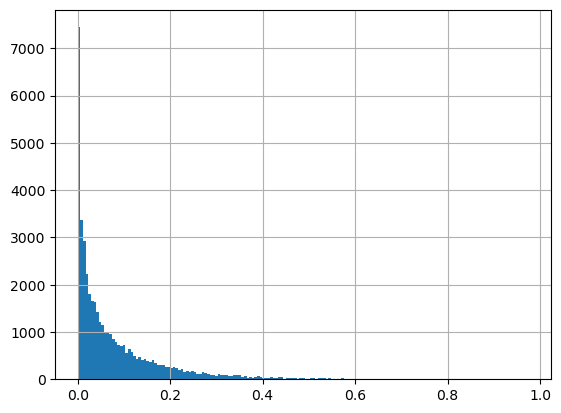

In [ ]:
t["cos_i"][g].hist(bins="fd")

In [ ]:
t

,system_id,total_radius,semi_major_axis,R_star,M_star,Magnitude_V,sigma_star,u1,u2,n_cameras,cos_i
28878,892,0.068453,8.297509,1.963,1.274,12.062901,0.00001,0.485361,0.134300,24.0,0.956052
28879,892,0.110007,9.168673,1.963,1.274,12.062901,0.00001,0.485361,0.134300,24.0,0.956052
28880,892,0.066073,9.521395,1.963,1.274,12.062901,0.00001,0.485361,0.134300,24.0,0.956052
28881,892,0.133377,7.055772,1.963,1.274,12.062901,0.00001,0.485361,0.134300,24.0,0.956052
28882,892,0.415530,1.729187,1.963,1.274,12.062901,0.00001,0.485361,0.134300,24.0,0.956052
...,...,...,...,...,...,...,...,...,...,...,...
17209,530,0.042905,9.151317,3.550,1.380,11.962277,0.00001,0.564232,0.100795,6.0,0.712439
17210,530,0.194043,8.213836,3.550,1.380,11.962277,0.00001,0.564232,0.100795,6.0,0.712439
17211,530,0.331094,4.465782,3.550,1.380,11.962277,0.00001,0.564232,0.100795,6.0,0.712439
17212,530,0.087454,14.780235,3.550,1.380,11.962277,0.00001,0.564232,0.100795,6.0,0.712439
